### Highly recommand running this file on google colab because of the heavily dataset

## Import



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from statistics import mean
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf
plt.style.use('seaborn')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Data Loading

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip "/content/drive/MyDrive/Data/US_Accidents_Dec20_Updated.csv.zip"

Archive:  /content/drive/MyDrive/Data/US_Accidents_Dec20_Updated.csv.zip
  inflating: US_Accidents_Dec20_Updated.csv  


In [ ]:
df = pd.read_csv('US_Accidents_Dec20_Updated.csv')
df_model = df.copy()

## Data Exploration

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Branch Ln.,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA-17) to Idylwild Rd (CA-17) due to accident.,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine Island Rd.,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df.tail()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,3001.0,Yale St,L,Houston,Harris,TX,77018-8433,US,US/Central,KMCJ,2018-06-28 08:35:00,84.2,NaN,70.0,30.02,9.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,NaN,Cypress Ave,R,Colton,San Bernardino,CA,92324,US,US/Pacific,KSBD,2019-01-10 02:00:00,46.9,NaN,74.0,30.14,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 - FL-973 at S Dade Expy N due to accident.,8798.0,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US,US/Eastern,KTMB,2020-11-23 12:53:00,76.0,76.0,85.0,30.00,10.0,NNW,16.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,NaN,I-215 N,R,Salt Lake City,Salt Lake,UT,84129,US,US/Mountain,KU42,2019-12-29 22:54:00,27.0,19.0,81.0,25.81,10.0,SSE,8.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906609,A-2906610,2,2018-03-26 13:35:03,2018-03-26 14:39:00,38.831749,-104.748161,38.831749,-104.748161,0.000,Accident on Murray Blvd at Byron Dr.,NaN,Byron Dr,R,Colorado Springs,El Paso,CO,80916,US,US/Mountain,KCOS,2018-03-26 13:54:00,51.1,NaN,38.0,29.77,10.0,SE,13.8,NaN,Scattered Clouds,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df.shape

(2906610, 47)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.isna().mean() * 100

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   9.730270
End_Lng                   9.730270
Distance(mi)              0.000000
Description               0.000000
Number                   65.081728
Street                    0.000000
Side                      0.000000
City                      0.003716
County                    0.000000
State                     0.000000
Zipcode                   0.038326
Country                   0.000000
Timezone                  0.118007
Airport_Code              0.227344
Weather_Timestamp         1.614148
Temperature(F)            2.312797
Wind_Chill(F)            40.729888
Humidity(%)               2.451997
Pressure(in)              1.957882
Visibility(mi)            2.479796
Wind_Direction            2.183781
Wind_Speed(mph)          10.567740
Precipitation(in)   

## Data Preprocessing

In [ ]:
dropped_columns = ['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight','Wind_Direction']


In [ ]:
df = df.drop(dropped_columns, axis=1).dropna()

In [ ]:
df.shape

(2571362, 35)

In [ ]:
df.isna().sum()

ID                   0
Severity             0
Start_Time           0
End_Time             0
Distance(mi)         0
Description          0
Street               0
Side                 0
City                 0
County               0
State                0
Zipcode              0
Country              0
Timezone             0
Airport_Code         0
Weather_Timestamp    0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
dtype: int64

In [ ]:
df.Weather_Timestamp = pd.to_datetime(df.Weather_Timestamp)
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)


In [ ]:
numeric_cols = ['Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop']
for col in numeric_cols:
  df[col] = df[col].astype('int')
  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2571362 entries, 0 to 2906609
Data columns (total 35 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   End_Time           datetime64[ns]
 4   Distance(mi)       float64       
 5   Description        object        
 6   Street             object        
 7   Side               object        
 8   City               object        
 9   County             object        
 10  State              object        
 11  Zipcode            object        
 12  Country            object        
 13  Timezone           object        
 14  Airport_Code       object        
 15  Weather_Timestamp  datetime64[ns]
 16  Temperature(F)     float64       
 17  Humidity(%)        float64       
 18  Pressure(in)       float64       
 19  Visibility(mi)     float64       
 20  Wind_Speed(mph)    float

In [ ]:
df.head(10)

,ID,Severity,Start_Time,End_Time,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,0.000,Accident on Tanner Rd at Pennbrooke Ln.,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,7.0,Fair,0,0,0,0,0,0,0,0,0,0,0,0,0
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,0.000,Accident on Houston Branch Rd at Providence Branch Ln.,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,3.0,Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,1.400,Stationary traffic on CA-17 from Summit Rd (CA-17) to Idylwild Rd (CA-17) due to accident.,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,6.0,Fair,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,0.000,Accident on US-395 Southbound at Topsy Ln.,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,4.6,Clear,0,0,0,0,0,0,0,0,0,0,0,1,0
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,0.000,Accident on I-595 Westbound at Exit 4 / Pine Island Rd.,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,13.8,Overcast,0,0,0,0,1,0,0,0,0,0,0,1,0
5,A-6,3,2018-10-17 16:40:36,2018-10-17 17:10:18,0.000,Three lanes blocked due to accident on I-77 Northbound at Exit 18 NC-24 W.T. Harris Blvd.,W W.T. Harris Blvd,R,Charlotte,Mecklenburg,NC,28269,US,US/Eastern,KJQF,2018-10-17 16:58:00,73.4,33.0,30.17,10.0,6.9,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0
6,A-7,4,2019-12-12 09:48:52,2019-12-12 10:18:05,14.153,Closed between CO-13/Taughenbaugh Blvd/Exit 90 and CR-240/Exit 105 - Road closed due to accident.,I-70 E,R,Rifle,Garfield,CO,81650,US,US/Mountain,KRIL,2019-12-12 09:46:00,28.0,88.0,24.67,2.0,3.0,Light Snow,0,0,0,0,0,0,0,0,0,0,0,0,0
7,A-8,2,2019-12-21 23:59:00,2019-12-22 00:32:06,0.000,At CA-60/Pomona Fwy - Accident.,CA-60 W,R,Whittier,Los Angeles,CA,90601,US,US/Pacific,KEMT,2019-12-21 23:53:00,55.0,40.0,29.86,10.0,5.0,Fair,0,0,0,0,0,0,0,0,0,0,0,0,0
8,A-9,2,2018-05-23 16:50:24,2018-05-23 22:50:24,0.969,At TN-248/Peytonsville Rd/Exit 61 - Accident. Right lane blocked.,Old Peytonsville Rd,R,Franklin,Williamson,TN,37064-5029,US,US/Central,KBNA,2018-05-23 16:53:00,87.1,43.0,30.04,10.0,8.1,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0
9,A-10,2,2019-01-30 08:44:18,2019-01-30 09:14:17,0.460,At Magic Mountain Pky - Accident. Hard shoulder blocked.,Golden State Fwy S,R,Valencia,Los Angeles,CA,91355,US,US/Pacific,K3A6,2019-01-30 08:39:00,57.0,77.0,29.08,5.0,5.0,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Analysis

### Which is the Top 10 Weather Condition of Affecting Severirity ?
(Đâu là top 10 điều kiện thời tiết ảnh hưởng đến mức độ nghiêm trọng của các vụ tai nạn ?)


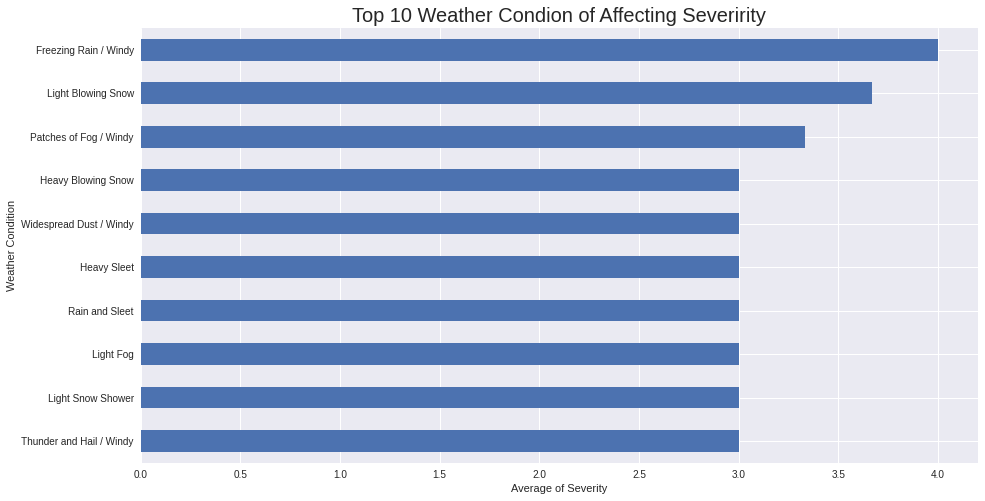

In [ ]:
ax = df.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False)[:10].sort_values().plot.barh(figsize=(15,8))
ax.set_xlabel('Average of Severity')
ax.set_ylabel('Weather Condition')
ax.set_title('Top 10 Weather Condition of Affecting Severirity', fontsize=20)
plt.show()

- **Mức độ hữu ích của câu hỏi này**: trả lời câu hỏi này cho chúng ta biết được tác động của điều kiện thời tiết tới tai nạn giao thông là như thế nào thông qua trung bình mức độ nghiêm trọng của các vụ tai nạn trong điều kiện thời tiết đó. Thông qua kết quả thu được từ insight này, chúng ta có thể có những lời khuyên hữu ích cho người tham gia giao thông rằng "***Nên tránh ra đường trong những loại hình thời tiết nào để giảm thiểu sự cố?***" hay "***Cần phải chuẩn bị những gì nếu bắt buộc phải tham gia giao thông trong những điều kiện thời tiết như thế này?***", ... Và thực hiện quan sát trên kết quả thu được ta cũng dễ dàng nhận ra các điều kiện thời tiết cực đoan thì có ảnh hưởng lớn đến mức độ nghiêm trọng của các vụ tai nạn giao thông
---
- **Tính hợp lí của câu hỏi**: câu hỏi này cho ta thấy được ảnh hưởng trực tiếp của điều kiện thời tiết lên các vụ tai nạn thông qua mức độ nghiêm trọng, nếu thay vì làm như trên mà ta lại đi thực hiện câu hỏi "***Đâu là top 10 điều kiện thời tiết có nhiều vụ tai nạn giao thông nhất?***" để chứng mình cho ảnh hưởng của thời tiết lên tai nạn giao thông là chưa hợp lí, bởi lẽ ví dụ điều kiện thời tiết là đẹp đẽ thoáng đãng thì sẽ có nhiều phương tiện giao thông đi lại hơn so với điều kiện thời tiết cực đoan như mưa đá và lốc xoáy, và vì mật độ tham gia giao thông cao hơn nên việc thời tiết đẹp đẽ có nhiều vụ tai nạn hơn so với mưa đá là chuyện bình thường, do đó mà nếu thực hiện câu hỏi này nó sẽ không phản ánh chính xác, khách quan mức độ ảnh hưởng của thời tiết lên các vụ tai nạn giao thông
---
- **Insight rút ra sau khi phân tích**: các điều kiện thời tiết xấu, cực đoan có ảnh hưởng xấu đến mức độ nghiêm trọng của các vụ tai nạn giao thông, từ đó nên có những khuyến cáo giúp người dân tránh lưu thông trong điều kiện thời tiết như vậy

### Is there any relationship between  weather condition to accident events ?

(Liêu có mối quan hệ nào giữa điều kiện thời tiết và các vụ tai nạn giao thông ?)

In [ ]:
top_10_weather_condition_df = df.Weather_Condition.value_counts().sort_values(ascending=False)[:10]

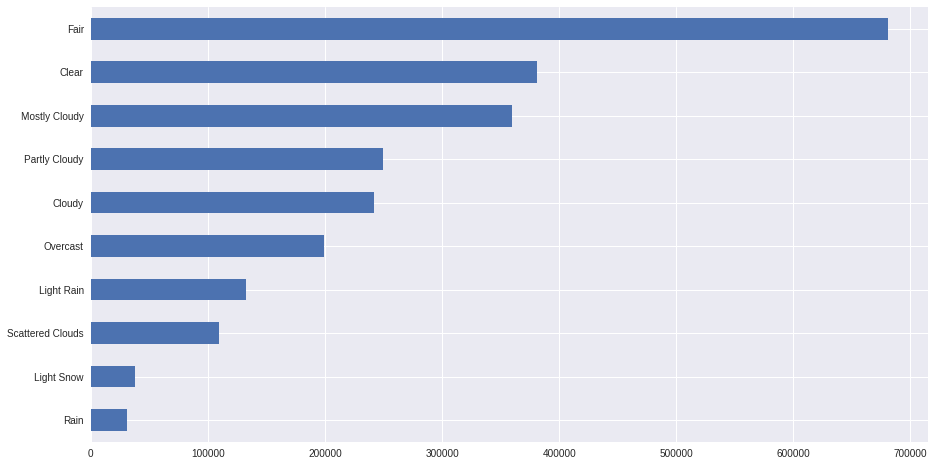

In [ ]:
top_10_weather_condition_df.sort_values().plot.barh(figsize=(15,8))
plt.show()

- **Mức độ hữu ích của câu hỏi**: như đã trình bày ở trên, việc tìm ra được top 10 điều kiện thời tiết có nhiều vụ tai nạn ô tô nhất nó không phản ánh được sự ảnh hưởng trực tiếp của thời tiết lên người tham gia giao thông và số vụ tai nạn, điều kiện thời tiết đẹp chắc chắn sẽ có số người tham gia giao thông nhiều hơn so với thời tiết cực đoan, vì thế khả năng xảy ra tai nạn có xu hướng sẽ nhiều hơn
---
- **Insight rút ra sau khi phân tích**: không có insight hữu ích nào được rút ra, ngoài việc cho chúng ta biết thời tiết nào có nhiều vụ tai nạn nhất

### Which states has the most likelyhood to road accident happen ?

(Những bang nào có số vụ tai nạn giao thông nhiều nhất ?)

In [ ]:
freq_df = df.groupby('State')['ID'].count()

In [ ]:
sorted_freq_df = freq_df.sort_values(ascending=False)
sorted_freq_df[0:10]

State
CA    632977
FL    242523
TX    202962
NY    114995
NC    108145
SC    105448
OR     87844
PA     78506
VA     75252
MN     73934
Name: ID, dtype: int64

In [ ]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=go.Choropleth(
    locations=freq_df.index, 
    z = freq_df.values, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = "Frequency",
    text = freq_df.index
))

fig.update_layout(
    title_text = 'Frequency Distribution of US Road Accidents by State',
    geo_scope='usa', 
)

fig.show()

- Thực hiện trực quan hóa về số lượng các vụ tai nạn trên tất cả các bang ở Mỹ thông qua freq_df, sorted_freq_df[0:10] cho biết top 10 bang có nhiều vụ tai nạn nhất
---
- **Mức độ hữu ích của câu hỏi**: trả lời được câu hỏi này, chúng ta sẽ biết được số lượng các vụ tai nạn giao thông ở từng bang của Mỹ, từ đó qua quan sát có thể cho ta biết được đâu là những bang xảy ra nhiều vụ tai nạn nhất. Insight này hữu ích bởi lẽ nó cho chúng ta thấy được rằng liệu có xảy ra điều gì bất thường trong số vụ tai nạn giao thông ở các bang hay không để từ đó đưa ra các biện pháp khắc phục, ví dụ như ta đi so sánh giữa hai bang: bang CA (California) đại diện cho bang có dân số đông (khoảng 38 triệu người) và bang Okahoma (OK) đại diện cho bang có dân số thấp (khoảng 3,8 triệu người), theo quan sát trên biểu đồ thì rõ ràng bang CA có số vụ tai nạn nhiều hơn hẳn so với OK, lần lượt là 632 977 vụ và 33 386 vụ, điều này hoàn toàn bình thường vì dân số CA gấp 10 lần OK, số lượng ô tô tham gia giao thông chắc chắn nhiều hơn, nhưng nếu giả sử OK có nhiều vụ tai nạn hơn CA hoặc là số vụ tai nạn ở OK chỉ kém 2 lần so với CA, ... mà không có lí do gì đằng sau thì thực sự rất vô lí, do đó mà thông qua insight này giúp ta nhận biết được các điểm bất thường trong giao thông ở các bang, chẳng hạn như là "***sự cố hư hại trên đoạn đường nào đó nhưng chưa được báo cáo***", hay "***khu vực nào đó trong bang thường xuyên có tình trạng thời tiết cực đoan hay đá lở gây tai nạn giao thông***", ... để từ đó khắc phục được tình trạng tai nạn diễn ra
---
- **Tính đúng đắn trong dữ liệu dùng để giải thích insight**: tham khảo về dân số các bang ở Mỹ tại [đây](https://vi.wikipedia.org/wiki/Danh_s%C3%A1ch_ti%E1%BB%83u_bang_Hoa_K%E1%BB%B3_theo_d%C3%A2n_s%E1%BB%91), với các bang đông dân thì mật độ tham gia giao thông cũng sẽ lớn hơn, do đó mà khả năng số vụ tai nạn giao thông xảy ra cũng sẽ nhiều hơn (không phải lúc nào cũng vậy, nhưng thường là nếu mật độ tham gia cao hơn thì dễ xảy ra tai nạn hơn) 
---
- **Insight rút ra được sau khi phân tích**:các vụ tai nạn giao thông thường xảy ra nhiều ở các bang dọc phía tây, đông và nam của nước Mỹ, hầu hết đều là các bang có dân số cao, điều kiện kinh tế, giao thông phát triển hơn cả, từ insight này ta có thể theo dõi sự bất thường của một bang nếu như số vụ tai nạn của nó đi ngược với xu hướng ***càng đông dân thì số vụ tai nạn càng nhiều***

### What are the Top 10 Cities of Accident Events ?

( Đâu là Top 10 thành phố xảy ra tai nạn nhiều nhất ?)

In [ ]:
top_10_cities_df = df.City.value_counts().sort_values(ascending=False)[:10]
tmp = top_10_cities_df.rename_axis('City').reset_index(name='Counts')
tmp

,City,Counts
0,Houston,60588
1,Los Angeles,54041
2,Charlotte,49905
3,Miami,46455
4,Dallas,46086
5,Austin,33047
6,Raleigh,28703
7,Sacramento,27002
8,Orlando,26334
9,Atlanta,25784


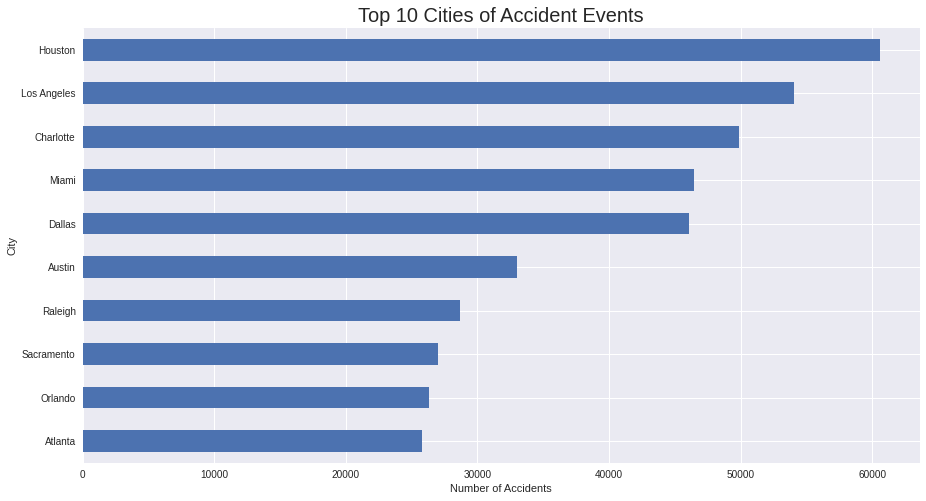

In [ ]:
top_10_cities_df.sort_values().plot.barh(figsize=(15,8))
plt.title('Top 10 Cities of Accident Events', fontsize=20)
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.show()

- **Mức độ hữu ích của câu hỏi**: tương tự như việc tìm ra top 10 bang có số vụ tai nạn giao thông nhiều nhất, insight này cung cấp cho ta top 10 thành phố, để từ đó phát hiện những điểm khác biệt, hay bất thường trong giao thông của các thành phố. Quan sát tại biểu đồ thu được ta nhận thấy top 10 thành phố có số vụ tai nạn giao thông hầu hết là các thành phố đông dân bậc nhất nước Mỹ, từ top 2 (về dân số) là Los Angeles tới top 44 là Miami (xem thêm tại [đây](https://vi.wikipedia.org/wiki/Danh_s%C3%A1ch_th%C3%A0nh_ph%E1%BB%91_Hoa_K%E1%BB%B3_x%E1%BA%BFp_theo_d%C3%A2n_s%E1%BB%91)). Tuy nhiên tới đây nhiều người sẽ thắc mắc tại sao New York là thành phố đông dân nhất nước Mỹ nhưng lại không có trong top 10 (nằm ở vị trí 65), như vậy insight này đã chỉ ra điểm khác lạ ở đây, và người phân tích, người quan sát sẽ đặt ra câu hỏi "***New York có gì đặc biệt mà lại xảy ra ít vụ tai nạn vượt bậc như vậy, mặc dù đông nhất nhất, điều này có đi ngược lại với suy luận càng đông dân sẽ khiến mật độ lưu thông ô tô tăng lên và gây nhiều tai nạn ô tô hơn không?***", từ đó đi tìm hiểu lí do vì sao như vậy. Ở đây New York xảy ra ít vụ tai nạn bởi lẽ nó là ***thành phố sử dụng phương tiện công cộng hiệu quả nhất nước Mỹ*** (xem ở [đây, mục môi trường](https://vi.wikipedia.org/wiki/Th%C3%A0nh_ph%E1%BB%91_New_York), do đó số vụ tai nạn ô tô xảy ra là ít hơn hẳn, do đó từ đây những người nhận được kết quả phân tích này sẽ có thể suy nghĩ đến việc nghĩ ra giải pháp tương tự như New York để giảm thiểu tai nạn ô tô cho các thành phố khác
---
- **Insight rút ra sau khi phân tích**: Các thành phố đông dân thường có số vụ tai nạn giao thông cao hơn so với các thành phố thưa dân, insight giúp chúng ta nhận biết sự bất thường nếu có thành phố đi ngược với xu hướng ***càng đông dân càng xảy ra nhiều tai nạn***, cụ thể là New York, từ đó tìm hiểu được nguyên nhân giúp New York hạn chế được tai nạn giao thông đó là nhờ hệ thống giao thông công cộng hiệu quả 

### Is there any influence of Traffic Sign to Accidents ?

(Liệu có ảnh hưởng nào của đèn tín hiệu giao thông đối với các vụ tai nạn ?)

In [ ]:
Accidents_related_traffic_sign = pd.DataFrame(df.Traffic_Signal.value_counts())
Accidents_related_traffic_sign.columns = ['Num of accidents related traffic signals nearby']
Accidents_related_traffic_sign

,Num of accidents related traffic signals nearby
0,2164739
1,406623


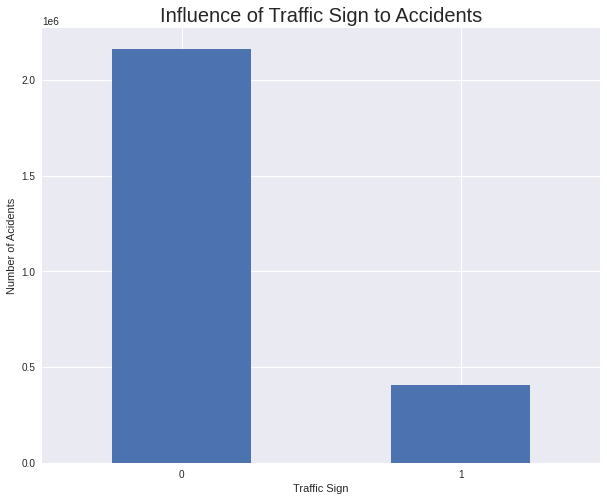

In [ ]:
ax = df.Traffic_Signal.value_counts().plot.bar(rot=0, figsize=(10, 8))
ax.set_title('Influence of Traffic Sign to Accidents', fontsize=20)
ax.set_xlabel('Traffic Sign')
ax.set_ylabel('Number of Acidents')
plt.show()

- **Mức độ hữu ích của câu hỏi**: insight cho chúng ta thấy được ở nơi xảy ra các vụ tai nạn có xuất hiện các biển báo giao thông hay không (0 là không có, 1 là có) và liệu nó có ảnh hưởng gì đến số vụ tai nạn giao thông hay không, nhìn biểu đồ phân tích này người ta có thể nhận ra rằng số vụ tai nạn giao thông xảy ra nhiều hơn ở những nơi không có biển báo (nhiều hơn khoảng 6 lần), từ đó có thể đặt ra một số câu hỏi về giải pháp rằng "***Liệu nếu tăng số lượng biển báo giao thông lên có làm giảm thiểu số vụ tai nạn hay không?"***
---
- **Insight rút ra sau khi phân tích**: Tai nạn giao thông thường xảy ra nhiều hơn ở những nơi không có biển báo giao thông. Thực chất insight này chỉ mang tính chất tương đối bởi lẽ ngoài traffic sign chúng ta còn có nhiều loại khác như crossing sign, traffic calming, roundabout,... chi phối rất nhiều đến các vụ tai nạn cho dù có hay không có traffic sign. Từ đó đặt ra câu hỏi về giải pháp "***Liệu nếu tăng số lượng biển báo giao thông lên có làm giảm thiếu số vụ tai nạn hay không?***".

### Does the absence of Railway Signal drive Accidents ?

(Liệu sự vắng mặt của tín hiệu đường sắt có dẫn đến các vụ tai nạn giao thông ?)

In [ ]:
Accidents_related_railway = pd.DataFrame(df.Railway.value_counts())
Accidents_related_railway.columns = ['Num of accidents related railway nearby']
Accidents_related_railway

,Num of accidents related railway nearby
0,2548597
1,22765


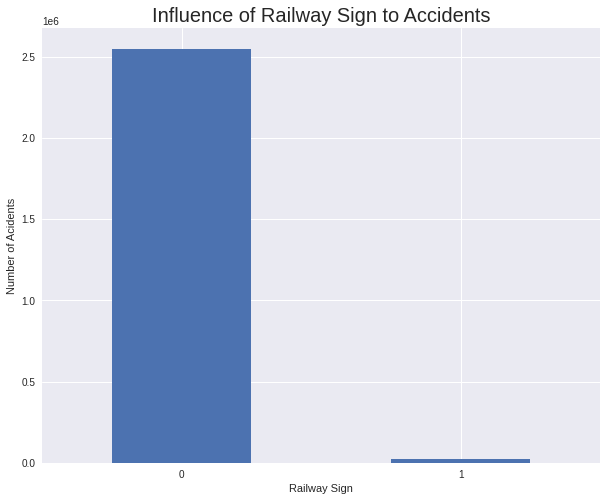

In [ ]:
ax = df.Railway.value_counts().plot.bar(rot=0, figsize=(10, 8))
ax.set_title('Influence of Railway Sign to Accidents', fontsize=20)
ax.set_xlabel('Railway Sign')
ax.set_ylabel('Number of Acidents')
plt.show()

- **Mức độ hữu ích của câu hỏi**: trước tiên quan sát biểu đồ và kết quả thu được, ta nhận thấy rằng số vụ tai nạn giao thông liên quan đến đường sắt xuất hiện lân cận là rất ít, chưa được 1% trên tổng số các vụ tai nạn, thông qua đó ta cũng chưa thể khẳng định được rằng liệu việc xuất hiện đường sắt có gây ra nhiều vụ tai nạn hơn hay không, muốn làm được điều này chúng ta phải biết thêm số lượng ô tô đi qua khu vực có đường sắt lân cận, từ đó mới thấy được sự ảnh hưởng của việc xuất hiện đường sắt lên số vụ tai nạn
---
- **Insight rút ra sau khi phân tích**: trường hợp này không rút ra được insight hữu ích nào 

### Is there any influence of Crossing Sign to Accidents ?

(Liệu có sự ảnh hưởng nào của vạch qua đường đối với các vụ tai nạn giao thông ?)

In [ ]:
Accidents_related_crossing = pd.DataFrame(df.Crossing.value_counts())
Accidents_related_crossing.columns = ['Num of accidents related crossing sign']
Accidents_related_crossing
197633/(197633+2373729)

0.07685926757881621

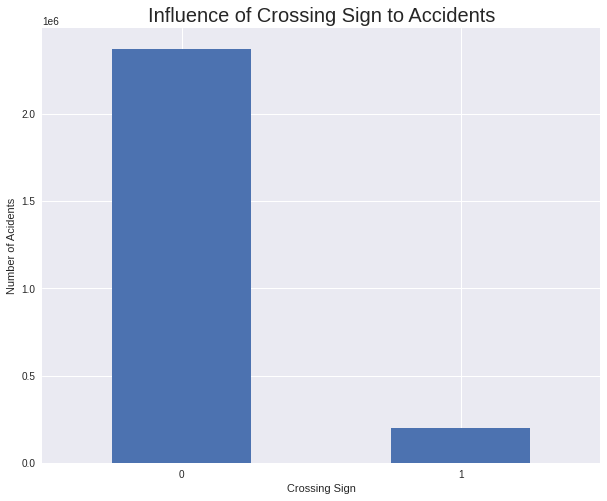

In [ ]:
ax = df.Crossing.value_counts().plot.bar(rot=0, figsize=(10, 8))
ax.set_title('Influence of Crossing Sign to Accidents', fontsize=20)
ax.set_xlabel('Crossing Sign')
ax.set_ylabel('Number of Acidents')
plt.show()

- **Mức độ hữu ích của câu hỏi**: tương tự như câu hỏi "***liệu traffic sign có ảnh hưởng gì đến các vụ tai nạn giao thông hay không***" đã làm ở trên ta có thể rút ra insight và đặt vấn đề tương tự. Tuy nhiên, quan sát ở một khía cạnh khác, nhìn vào kết quả và biểu đồ trực quan, chúng ta nhận thấy rằng số vụ tai nạn giao thông liên quan đến biển báo qua đường chiếm gần 8% trong tổng số vụ tai nạn giao thông (cụ thể là 197 633 vụ), nhiều hơn tổng số vụ tai nạn giao thông tại các bang có dân số trung bình, điều này thực sự đáng quan ngại, do đó mà câu hỏi được đặt ra là "***liệu việc sắp xếp hay bố trí Crossing Sign trong thực tế là đã phù hợp hay chưa?***"
---
- **Insight rút ra sau khi phân tích**: 
  - 1. Tương tự như trên, chúng ta có thể rút ra rằng tai nạn thì xảy ra nhiều hơn ở những vị trí không có crossing sign, tuy nhiên insight này chỉ mang tính chất tương đối bởi lẽ ngoài crossing sign còn nhiều yếu tố chi phối đến số vụ tai nạn, như traffic sign, traffic calming, roundabout,... từ đó đặt ra câu hỏi tương tự ở trên là: "***Liệu việc bố trí thêm crossing sign có làm giảm thiểu số vụ tai nạn hay không?***"
  - 2. Nhìn vào một khía cạnh phân tích khác, ta có insight: mặc dù số vụ tai nạn tại những điểm có crossing sign chỉ chiếm 8% so với tổng số tai nạn, tuy nhiên về số lượng thì nó hơn cả số vụ tai nạn của một bang có dân số trung bình, thông qua insight này chúng ta sẽ có những câu hỏi chẳng hạn "***Liệu việc sử dụng crossing sign là đã hiệu quả chưa? Có cần kết hợp thêm traffic light tại các crossing sign để giảm thiểu tai nạn hay không?***"

### Does Visibility affect Accidents ?

(Liệu tầm nhìn có ảnh hưởng đến các vụ tai nạn giao thông hay không ?)

In [ ]:
visibility_df = df['Visibility(mi)'].value_counts()

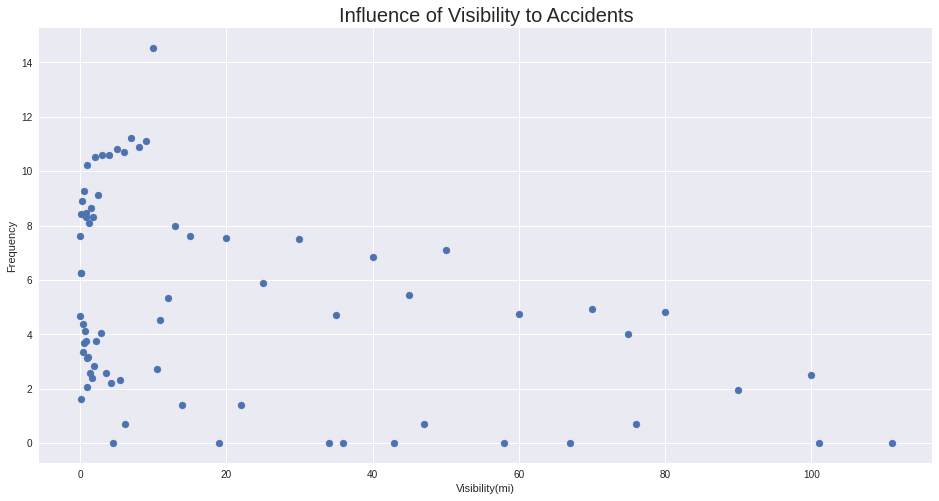

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(x=visibility_df.index, y=np.log(visibility_df.values))
plt.title('Influence of Visibility to Accidents', fontsize=20)
plt.xlabel('Visibility(mi)')
plt.ylabel('Frequency')
plt.show()

- **Mức độ hữu ích của câu hỏi**: câu hỏi giúp ta xác định ảnh hưởng của tầm nhìn khi tham gia giao thông lên số vụ tai nạn giao thông, quan sát biểu đồ chúng ta dễ dàng nhận thấy rằng tầm nhìn càng xa thì số lượng vụ tai nạn giao thông xảy ra càng thấp, đặc biệt tầm nhìn dưới 20 mi khả năng xảy ra tai nạn ô tô là rất lớn
---
- **Insight thu được sau khi phân tích**: tầm nhìn càng hạn chế thì khả năng xảy ra tai nạn giao thông càng cao, thông qua insight này chúng ta đưa ra lời khuyên cụ thể cho người tham gia giao thông chẳng hạn như "***cần hạn chế tham gia giao thông khi gặp phải điều kiện thời tiết khiến tầm nhìn hạn chế***" hoặc "***khi tham gia giao thông vào trời sương mù, hạn chế tầm nhìn, hãy giảm tốc độ và bật đèn xe***"

### What is the hour whose the most likelyhood of Accident Events ???

(Đâu là khung giờ có số vụ tai nạn giao thông xảy ra nhiều nhất ?)

In [ ]:
hour_df = df['Start_Time'].dt.hour.value_counts()


In [ ]:
hour_df = hour_df.sort_index()

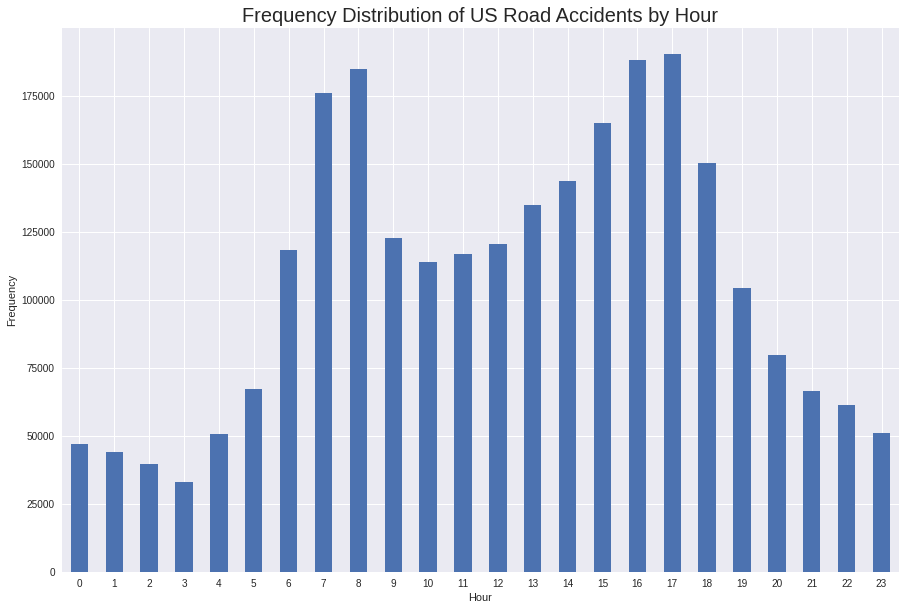

In [ ]:
ax = hour_df.plot.bar(rot = 0, figsize=(15,10))
ax.set_title('Frequency Distribution of US Road Accidents by Hour', fontsize=20)
ax.set_xlabel('Hour')
ax.set_ylabel('Frequency')
plt.show()

- **Mức độ hữu ích của câu hỏi**: câu hỏi giúp chúng ta xác định được đâu là khung giờ xảy ra nhiều vụ tai nạn giao thông nhất, từ đó tìm hiểu lí do và biện pháp khắc phục. Quan sát vào biểu đồ ta nhận thấy rằng các khung giờ 7-8h hay 16-17h xảy ra nhiều vụ tai nạn ô tô nhất, số vụ tai nạn có xu hướng giảm dần về khuya và rạng sáng, có thể lí giải cho vấn đề này đó là việc 7h-8h/16h-17h là khung giờ người dân phải rời khỏi nhà để đến nơi làm việc/rời công ty tan làm, dẫn đến mật độ tham gia giao thông cao, làm tăng nguy cơ xảy ra tai nạn
---
- **Insight rút ra sau khi phân tích**: khung giờ 7h-8h và 16h-17h là hai khung giờ xảy ra nhiều tai nạn ô tô nhất, do mật độ lưu thông cao vì đó là giờ người dân đi làm hoặc tan làm, từ đó tìm ra giải pháp giảm thiểu lưu lượng xe trong hai khung giờ này bằng các cách cụ thể như ***điều phối giờ tan làm giữa các công ty***, hoặc ***bố trí cảnh sát giao thông phân luồng giao thông một cách hiệu quả***

### How many accidents happend on days of week?

(Có bao nhiêu vụ tai nạn giao thông xảy ra trong các ngày trong tuần)

In [ ]:
df['Day'] = df['Start_Time'].dt.dayofweek
day_accidents = df.groupby('Day').agg({'Day' : 'count'})
df.drop('Day',axis=1,inplace=True)
day_accidents.columns = ['Num of Accidents']
day_accidents

,Num of Accidents
Day,
0,418457
1,444433
2,448493
3,448763
4,449506
5,194710
6,167000


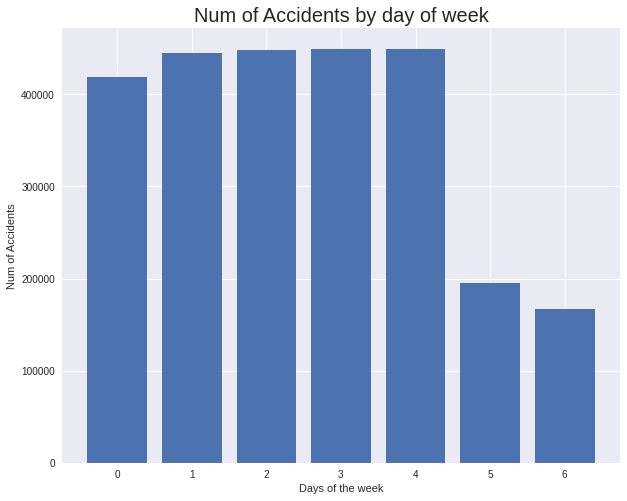

In [ ]:
plt.figure(figsize=(10,8))

plt.bar(day_accidents.index,day_accidents['Num of Accidents'])


plt.xlabel("Days of the week" )
plt.ylabel("Num of Accidents")
plt.title('Num of Accidents by day of week', fontsize = 20)

plt.show()

- **Mức độ hữu ích của câu hỏi**: trả lời được câu hỏi, chúng ta sẽ biết được số vụ tai nạn phân bố như thế nào trong tuần, ngày nào cao hay thấp, từ đó tìm ra được nguyên nhân và biện pháp khắc phục. Quan sát biểu đồ và kết quả thu được nhận thấy các vụ tai nạn thường xảy ra vào các ngày lao động trong tuần (thứ 2-thứ 6), giảm mạnh vào 2 ngày cuối tuần
---
- **Insight rút ra sau khi phân tích**: các vụ tai nạn xảy ra nhiều vào các ngày lao động, giảm mạnh vào các ngày cuối tuần, nguyên nhân có thể là vì ngày đi làm, mật độ tham gia giao thông lớn nên nguy cơ xảy ra tai nạn là nhiều hơn, ... từ đó đề ra biện pháp "***phân luồng giao thông hợp lí vào những ngày đi làm***" hay "***khuyến khích người dân di chuyển rải rác, tránh tập trung vào giờ cao điểm để giảm thiểu tai nạn ô tô***"

### what is the distributrion of accident events following the hours and the days in week ?

(Đâu là phân bố của các vụ tai nạn giao thông theo các giờ và các ngày trong tuần ?)

In [ ]:
df['Day'] = df['Start_Time'].dt.dayofweek
df['Hour'] = df['Start_Time'].dt.hour
tmp = df[['Day', 'Hour']]
tmp = tmp.groupby(['Hour', 'Day']).agg({'Hour':'count'})
tmp = tmp.unstack(level = 0)
tmp

Hour                                                                    \
Hour    0     1     2     3     4      5      6      7      8      9      10   
Day                                                                            
0     5510  4922  5004  4692  8661  12163  21561  31718  33016  20903  18950   
1     7205  6217  5339  4410  7458  11107  22463  35468  37996  23118  19685   
2     7312  7191  5892  4588  8105  11574  22334  34080  36314  22878  19398   
3     7536  7115  6097  4972  8163  11596  21446  33046  34722  21961  19713   
4     6937  6384  5493  4749  8785  11497  19691  29250  30315  20231  19960   
5     6880  6709  6583  5016  4675   4744   5678   6704   6832   7601   8664   
6     5685  5559  5350  4759  4791   4664   5228   5910   5673   6247   7444   

                                                                            \
Hour     11     12     13     14     15     16     17     18     19     20   
Day                                                                          
0     19158  18951  21151  23212  27223  31838  31600  24044  16241  12102   
1     19222  19673  22270  23752  28079  33334  34488  26668  16769  12314   
2     19350  19923  22920  23990  28785  32869  34930  27046  17655  13001   
3     19600  19855  22461  24348  28990  34086  35873  27125  18312  13225   
4     21507  22437  24769  26304  31540  36014  35202  27423  18696  13689   
5      9721  11016  12066  12276  11367  10939   9806   9636   8776   8145   
6      8196   8773   9398   9826   9268   9035   8522   8495   7823   7124   

                          
Hour     21     22    23  
Day                       
0      9561   8949  7327  
1      9877   9363  8158  
2     10282   9876  8200  
3     10950   9835  7736  
4     10774  10141  7718  
5      7800   6933  6143  
6      7092   6367  5771

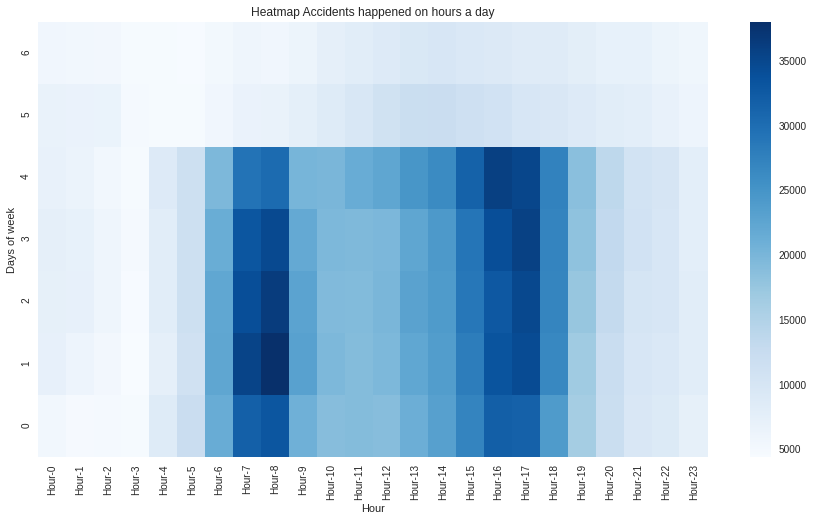

In [ ]:
plt.figure(figsize = (15, 8))
ax = sns.heatmap(tmp, cmap='Blues')
ax.invert_yaxis()
plt.xlabel('Hour')
plt.ylabel('Days of week')
plt.title('Heatmap Accidents happened on hours a day');

- **Insight mới được rút ra**: các vụ tai nạn ô tô xảy ra nhiều nhất vào các khung giờ 7h-8h và 16h-17h vào các ngày đi làm từ thứ 2 - thứ 6, thông qua insight mới này dễ dàng hình dung được khung giờ nào của ngày nào có số vụ tai nạn ô tô cao để từ đó thực hiện biện pháp giảm thiểu tai nạn như "***điều phối giao thông***", "***khuyên người dân đi làm hoặc tan làm rải rác, tránh tập trung vào giờ cao điểm***"

### What is the distribution of Accident over the month periods ?

(Đâu là phân bố của các vụ tai nạn giao thông qua các tháng ?)

In [ ]:
df['Month'] = df['Start_Time'].dt.month
month = df['Month'].value_counts().sort_index()
month_index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df.drop('Month', axis=1, inplace=True)

In [ ]:
month_df = pd.DataFrame({'Month': month.values}, index=month_index)
month_df

,Month
Jan,168902
Feb,161552
Mar,174644
Apr,189591
May,187135
Jun,193171
Jul,135171
Aug,168321
Sep,223182
Oct,290771


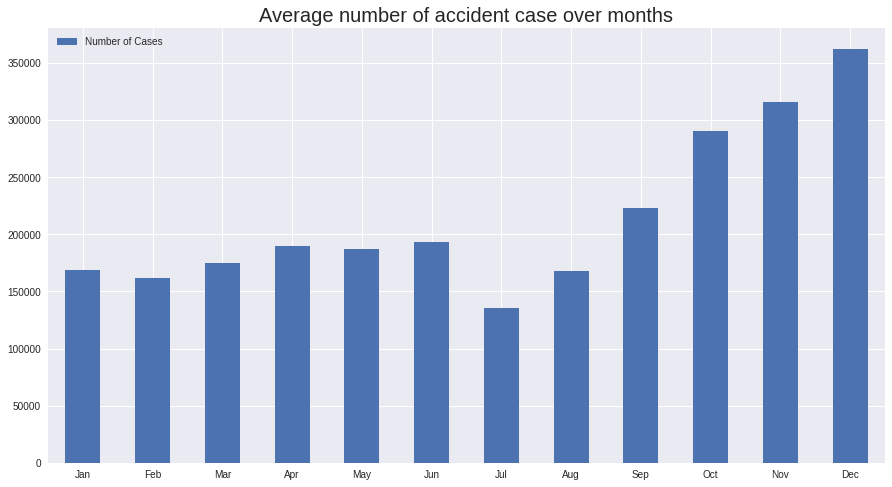

In [ ]:
ax = month_df.plot.bar(rot=0, figsize=(15,8))
ax.legend(['Number of Cases'])
ax.set_title('Average number of accident case over months', fontsize=20)
plt.show()

- **Mức độ hữu ích của câu hỏi**: câu hỏi giúp chúng ta xác định đâu là tháng có số lượng vụ tai nạn ô tô là nhiều nhất, từ đó tìm ra lí giải phù hợp cũng như các biện pháp khắc phục. Quan sát trên biểu đồ ta nhận thấy số vụ tai nạn ô tô có xu hướng gia tăng về cuối năm, điều này tỏ ra hợp lí bởi lẽ đây là khoảng thời gian diễn ra nhiều ngày lễ quan trọng nhất tại Mỹ (Christmas, Thanks Giving, New Year Eve,... xem thêm tại [đây](https://en.wikipedia.org/wiki/Public_holidays_in_the_United_States)) do đó mà mật độ tham gia giao thông sẽ rất lớn, nên số vụ tai nạn giao thông xảy ra nhiều hơn
---
- **Insight rút ra sau khi phân tích**: các vụ tai nạn giao thông có xu hướng nhiều lên vào các tháng cuối năm và đạt đỉnh vào tháng 12, bởi lẽ đây là thời gian diễn ra các ngày lễ lớn ở Mỹ, từ đó tìm ra các biện pháp khắc phục cụ thể chẳng hạn như "***thực hiện phân luồng giao thông hiệu quả trong các ngày lễ ở các tháng này***" hay "***trong mùa dịch covid khuyến khích người dân ở nhà vừa phòng dịch, vừa hạn chế lưu lượng tham gia giao thông***"

### What is the trend of servirity over days of the week ?

(Đâu là xu hướng của mức độ nghiêm trọng của các vụ tai nạn giao thông trong các ngày trong tuần ?)

In [ ]:
days_week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = df['Start_Time'].dt.dayofweek
day_severity = df[['Day' , 'Severity']].groupby('Day').agg({'Day' : 'count' , 'Severity' : 'mean'})
df.drop('Day',axis=1,inplace=True)
day_severity.columns = ['Num of Accidents', 'Severity']
num_accidents = day_severity['Num of Accidents']
severity = day_severity['Severity']
print(day_severity['Severity'].mean())
day_severity = day_severity.reindex(days_week)
day_severity['Num of Accidents'] = num_accidents.values
day_severity['Severity'] = severity.values
day_severity

2.28990968670919


,Num of Accidents,Severity
Day,,
Monday,418457,2.265193
Tuesday,444433,2.264886
Wednesday,448493,2.261777
Thursday,448763,2.264173
Friday,449506,2.273947
Saturday,194710,2.341847
Sunday,167000,2.357545


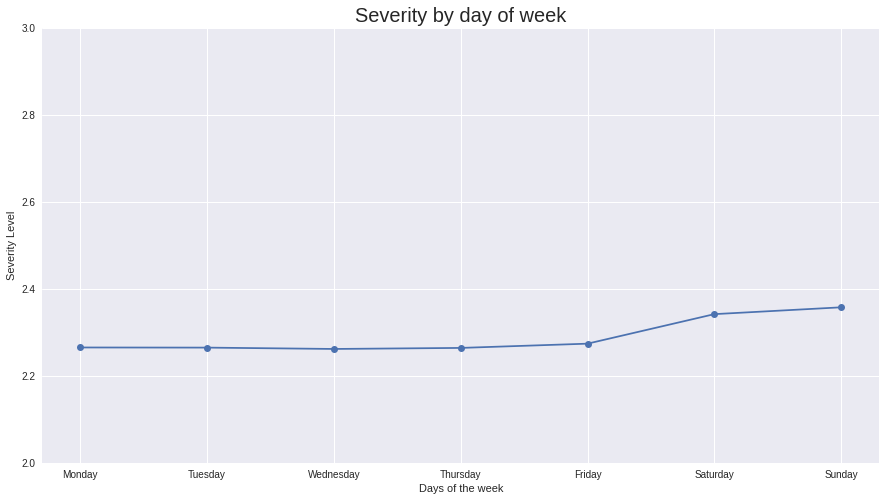

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(day_severity['Severity'], marker='o')


plt.xlabel("Days of the week" )
plt.ylabel("Severity Level")
plt.title('Severity by day of week', fontsize=20)
plt.ylim(2, 3)

plt.show()

 - **Mức độ hữu ích của câu hỏi**: câu hỏi giúp chúng ta xác định xu hướng của mức độ nghiêm trọng của các vụ tai nạn ở các ngày trong tuần. Quan sát trên kết quả thu được và  biểu đồ, ta nhận thấy mức độ nghiêm trọng của các vụ tai nạn có trung bình là 2.29, xu hướng gia tăng về các ngày cuối tuần, trả lời được câu hỏi giúp chúng ta có thể tìm ra nguyên nhân hợp lí gây nên hệ quả trên, "***liệu cuối tuần mọi người đều nghỉ ngơi, không ra đường nhiều, khiến giao thông thông thoáng làm tài xế chủ quan dẫn đến gia tăng mức độ nghiêm trọng?***",...
 ---
 - **Insight rút ra được sau khi phân tích**: mức độ nghiêm trọng của các vụ tai nạn tại các ngày trong tuần không chênh lệch nhiều, tuy nhiên có xu hướng tăng dần vào cuối tuần, insight giúp cho chúng ta hình dung về hàng loạt nguyên nhân lí giải cho hệ quả này

### What is the proportion of Severity of Accident Events ?

(Đâu là tỉ trọng phần trăm của các mức độ nghiêm trọng của các vụ tai nạn giao thông ?)

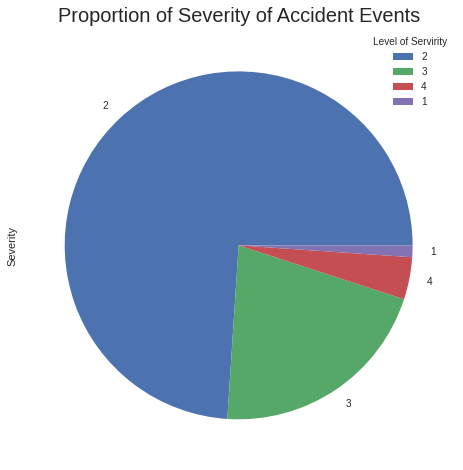

In [ ]:
df.Severity.value_counts().plot.pie(figsize=(15,8))
plt.legend(title='Level of Servirity')
plt.title('Proportion of Severity of Accident Events', fontsize=20)
plt.show()

- **Mức độ hữu ích của câu hỏi**: trả lời được câu hỏi giúp chúng ta xác định được mức độ nghiêm trọng của các vụ tai nạn có xu hướng như thế nào. Quan sát trên biểu đồ dễ dàng nhận thấy các vụ tai nạn hầu hết có mức độ nghiêm trọng là 2 và 3
---
- **Insight rút ra sau khi phân tích**: các vụ tai nạn đa phần có mức độ nghiêm trọng là 2 và 3 (trên thang đo 1-4), xác định được mức độ nghiêm trọng giúp chúng ta hình dung được một số vấn đề cần phải giải quyết, chẳng hạn như nếu mức độ nghiêm trọng của các vụ tai nạn tập trung phần lớn ở 3 và 4 thì chúng ta cần phải xem lại đâu là nguyên nhân, "***do chất lượng đường tham gia giao thông chưa tốt, dẫn đến mức độ khi xảy ra tai nạn càng tăng***", hay "***ý thức của người dân tham gia giao thông ngày càng giảm sút khiến mức độ nghiêm trọng gia tăng***", từ đó đề ra biện pháp hợp lí

### The level of the road extent affected by accidents?

(Đâu là mức độ ảnh hưởng của các vụ tai nạn giao thông đối với mặt đường ?)

In [ ]:
Distance_Accidents = df['Distance(mi)']
ranges = [0, 5, Distance_Accidents.max()]
Distance_Accidents =  Distance_Accidents.groupby(pd.cut(Distance_Accidents, ranges)).count()
Distance_Accidents

Distance(mi)
(0.0, 5.0]       1149149
(5.0, 251.22]      30832
Name: Distance(mi), dtype: int64

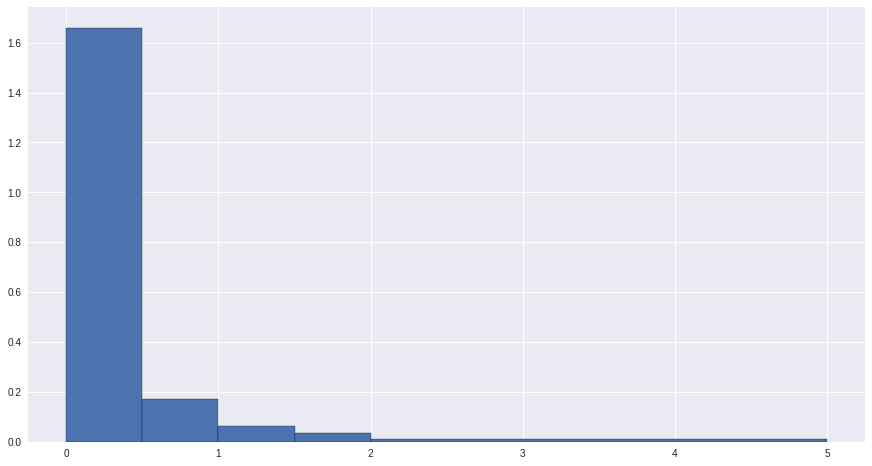

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(df['Distance(mi)'], bins=[0, 0.5, 1, 1.5, 2, 5],edgecolor='black', density=True);

- **Mức độ hữu ích của câu hỏi**: trả lời được câu hỏi, chúng ta có thể xác định được mức độ ảnh hưởng của các vụ tai nạn lên mặt đường, các vụ tai nạn có tính kéo lê càng nhiều thì càng ảnh hưởng đến mặt đường tham gia giao thông. Quan sát trên kết quả thu được, và biểu đồ trực quan, chúng ta nhận thấy rằng các vụ tai nạn kéo lê trên mặt đường từ 0-5mi chiếm tới 97%, phần lớn ở khoảng 0-1mi 
---
- **Insight rút ra sau khi phân tích**: 97% vụ tai nạn ô tô xảy ra và bị kéo lê trên mặt đường khoảng từ 0-5mi, do đó chúng ta nhận thấy ảnh hưởng của các vụ tai nạn lên bề mặt đường đi là không lớn, từ insight này chúng ta có thể phỏng đoán được mức độ ảnh hưởng của các vụ tai nạn lên mặt đường là bao nhiêu, càng nhiều vụ tai nạn kéo rê trên mặt đường thì tổn hại lên mặt đường càng cao

## (*) Figure out the trend of accidents and predict it in the near future

(Xu hướng và dự đoán các vụ tai nạn giao thông trong tương lai gần)

### Analyze

Đầu tiên ta gom nhóm dữ liệu theo ngày xảy ra tai nạn và đếm chúng để lấy được số vụ tai nạn xảy ra trong 1 ngày

In [ ]:
df_model.Start_Time = pd.to_datetime(df_model.Start_Time)

In [ ]:
Num_accidents_daily = df_model.Start_Time.dt.date.value_counts()
Num_accidents_daily.index = pd.to_datetime(Num_accidents_daily.index)
Num_accidents_daily.sort_index(inplace=True)
Num_accidents_daily.name = 'Accidents'
Num_accidents_daily.head()

2016-02-08    41
2016-02-09    41
2016-02-10    40
2016-02-11    77
2016-02-12    14
Name: Accidents, dtype: int64

---

Do dữ liệu được tạo ra từ ghi nhận từng vụ tai nạn nên có thể sẽ có những ngày không xảy ra sẽ không được ghi nhận. Vì vậy, ta sẽ thực hiện chèn thêm những ngày không có ghi nhận và cho số vụ tai nạn bằng 0

In [ ]:
filldate = pd.Series(pd.date_range(start='2016-02-08',end='2020-12-31'),name='Date')
data = pd.merge(Num_accidents_daily,filldate,left_index=True,right_on='Date',how='right').set_index('Date')
data.fillna(0,inplace=True)
data = data.Accidents
data

Date
2016-02-08      41.0
2016-02-09      41.0
2016-02-10      40.0
2016-02-11      77.0
2016-02-12      14.0
               ...  
2020-12-27    5029.0
2020-12-28    8415.0
2020-12-29    7977.0
2020-12-30    9191.0
2020-12-31    7242.0
Name: Accidents, Length: 1789, dtype: float64

Trực quan hóa đơn giản để có cảm nhận đầu tiên về dữ liệu

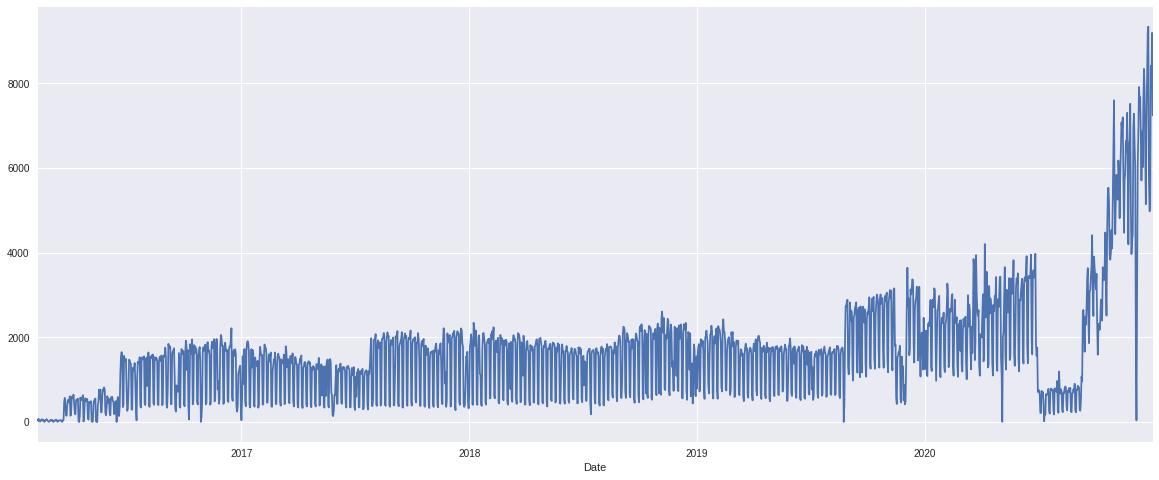

In [ ]:
plt.figure(figsize=(20,8))
data.plot()
plt.show()

Nhóm coi như số vụ tai nạn sẽ là một biến phụ thuộc vào thời gian để phân tích và dự đoán

Ta sẽ thực hiện phân tách dữ liệu theo thời gian thành các yếu tố seasonal, trend, và resid. Ngoài ra, do dữ liệu có tồn tại các giá trị 0 nên ta sẽ không thể sử dụng mô hình multiplicative (tích) mà chỉ có thể dùng mô hình additive (cộng)

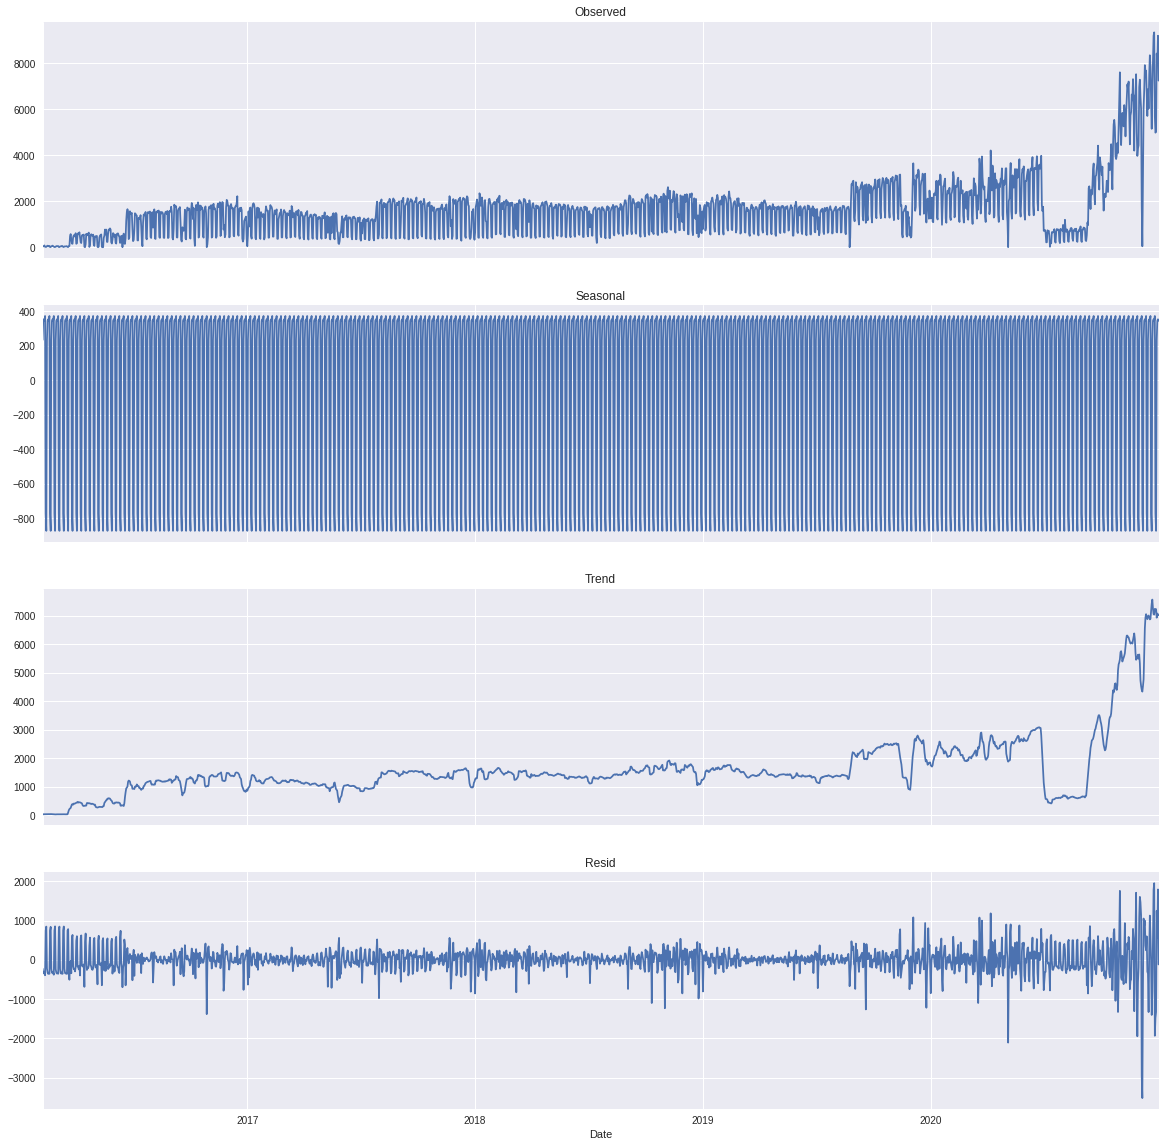

In [ ]:
decompose_res = tsa.seasonal_decompose(data,extrapolate_trend='freq')
fig, ax = plt.subplots(4,1,figsize=(20,20),sharex=True)

decompose_res.observed.plot(ax=ax[0])
decompose_res.seasonal.plot(ax=ax[1])
decompose_res.trend.plot(ax=ax[2])
decompose_res.resid.plot(ax=ax[3])

ax[0].set_title('Observed')
ax[1].set_title('Seasonal')
ax[2].set_title('Trend')
ax[3].set_title('Resid')
plt.show()

Mô hình được nhóm sử dụng để giải quyết vấn đề này là mô hình **ARIMA**. Vì vậy, ta cần xác định bậc của sai phân tốt nhất.

Do hiện tại, ARIMA chỉ hỗ trợ đến bậc 2 nên ta sẽ xét 2 trường hợp sai phân bậc 1 và bậc 2.

Ngoài ra, dữ liệu ta xét ở đây cần phải không có tính chu kỳ, vì vậy ta sử dụng thành phần đã khử chu kỳ là `decompose_res.trend`

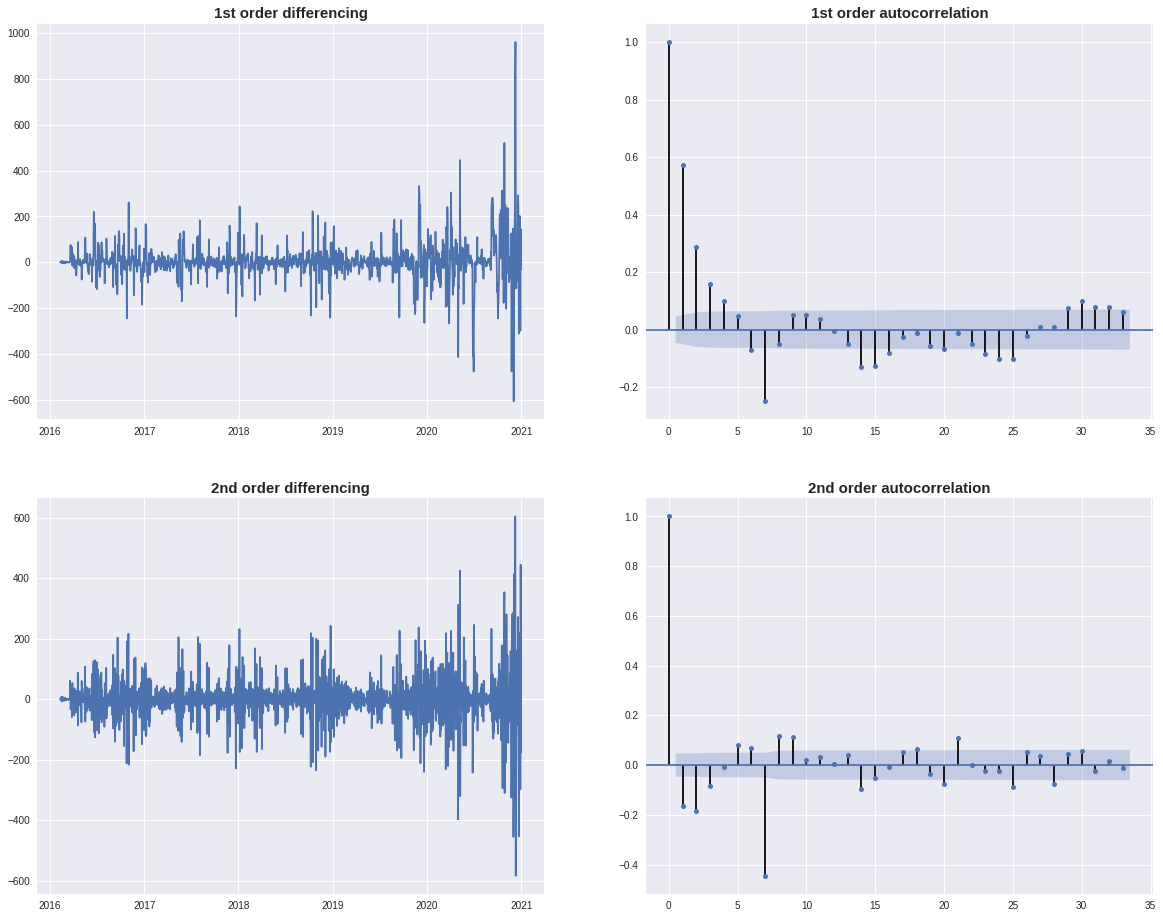

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,16))
ax[0,0].plot(decompose_res.trend.diff()); 
ax[0,0].set_title('1st order differencing',fontsize=15,fontweight='bold')

plot_acf(decompose_res.trend.diff().dropna(),ax=ax[0,1]);
ax[0,1].set_title('1st order autocorrelation',fontsize=15,fontweight='bold')

ax[1,0].plot(decompose_res.trend.diff().diff());
ax[1,0].set_title('2nd order differencing',fontsize=15,fontweight='bold')

plot_acf(decompose_res.trend.diff().diff().dropna(),ax=ax[1,1]);
ax[1,1].set_title('2nd order autocorrelation',fontsize=15,fontweight='bold')
plt.show()

Như ta thấy được với kết quả ở trên, ta nhận thấy được sai phân bậc 1 vẫn còn có tính xu hướng dựa vào biểu đồ hàm tự tương quan của nó. Ở sai phân bậc 2 vẫn còn nhưng ít hơn, vì vậy, ta sẽ sử dụng sai phân bậc 2 cho mô hình ARIMA.

Ngoài ra, với tại vị trí lag=7 cho thấy có độ tương quan rất lớn vì vậy ta sẽ chọn p = 7 

### Forecast

Trực quan và huấn luyện mô hình

In [ ]:
model = tsa.ARIMA(decompose_res.trend,order=(7,2,1))
fitted = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



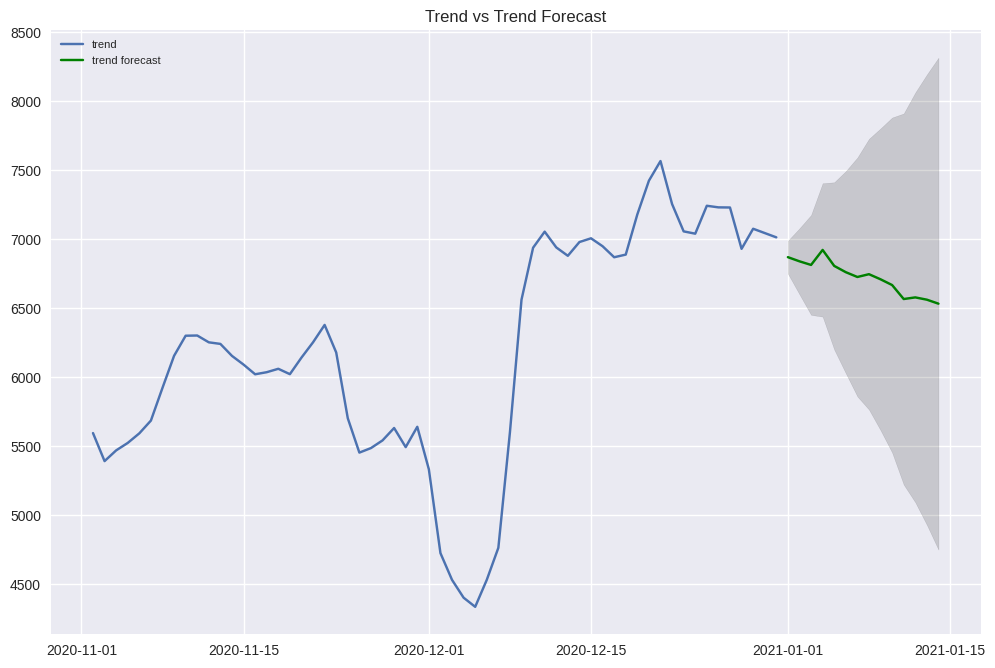

In [ ]:
fc,se,conf = fitted.forecast(14,alpha=0.05)

index_ = pd.date_range('2021-01-01','2021-01-14')

fc_series = pd.Series(fc, index=index_, name='forecast')
lower_series = pd.Series(conf[:, 0], index=index_)
upper_series = pd.Series(conf[:, 1], index=index_)
plt.figure(figsize=(12,8), dpi=100)
plt.plot(decompose_res.trend[-60:], label='trend')
plt.plot(fc_series, label='trend forecast',color='g')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)

plt.title('Trend vs Trend Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Theo như kết quả dự đoán của mô hình thì số vụ tai nạn trong tương lai gần (ở đây nhóm chọn là 2 tuần) sẽ có xu hướng giảm

---

Áp lại tính chu kỳ vào kết quả dự đoán xu hướng để có được dự đoán cụ thể cho dữ liệu

In [ ]:
ss_series = decompose_res.seasonal.append(fc_series).shift(14).tail(14) # dữ liệu chu kỳ cho dự đoán của mô hình
new_fc_series = fc_series + ss_series
new_lower_series = lower_series + ss_series
new_upper_series = upper_series + ss_series

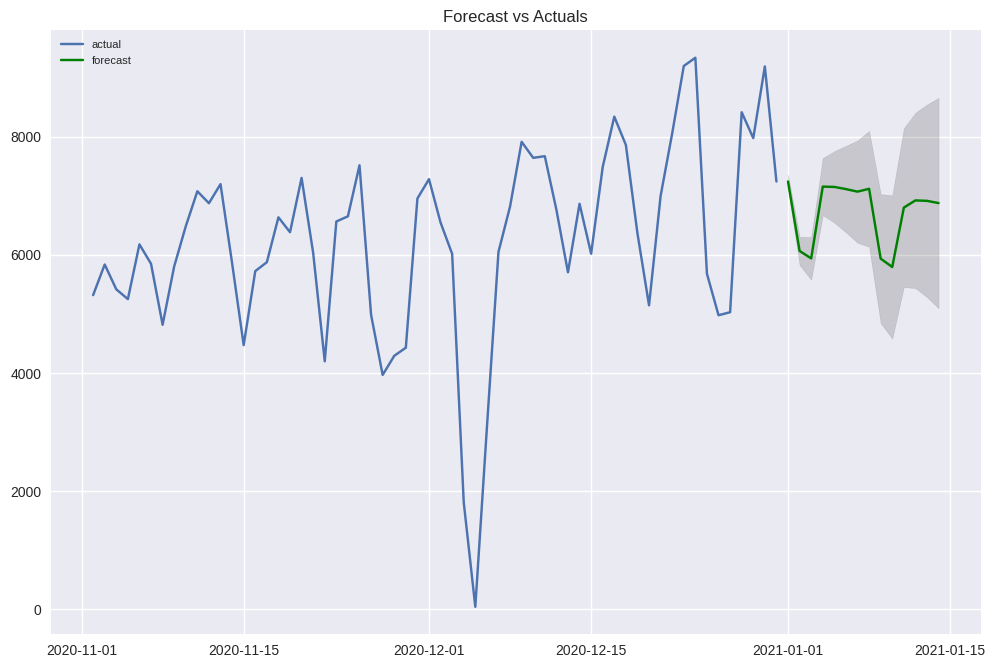

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
plt.plot(data[-60:],label='actual')
plt.plot(new_fc_series, label='forecast',color='g')
plt.fill_between(new_lower_series.index, new_lower_series, new_upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## (**) Suggest solution & estimate efficiency of it (benefits & losses)

### what would the severity be if there were traffic sign appearance ?

(Mức độ nghiêm trọng của các vụ tai nạn giao thông bị ảnh hưởng như thế nào nếu có sự xuất hiện của đèn tín hiệu giao thông ?)

#### Tiền xử lý dữ liệu cho mô hình dự đoán

In [ ]:
traffic_signal_df = df.drop(['ID','Start_Time', 'End_Time', 'Distance(mi)',
       'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp'], axis=1)

In [ ]:
traffic_signal_df.Weather_Condition = pd.get_dummies(traffic_signal_df.Weather_Condition)

#### Tách các tập dữ liệu

In [ ]:
X_train = traffic_signal_df[traffic_signal_df.Traffic_Signal == 1].drop('Severity', axis=1)
y_train = traffic_signal_df[traffic_signal_df.Traffic_Signal == 1]['Severity']
X_test = traffic_signal_df[traffic_signal_df.Traffic_Signal == 0].drop('Severity', axis=1)
X_test.Traffic_Signal = 1 # assuming there were appearance of traffic signal
y_test = traffic_signal_df[traffic_signal_df.Traffic_Signal == 0]['Severity']

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(406623, 20) (406623,)
(2164739, 20) (2164739,)


In [ ]:
X_train

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Hour
3,53.6,16.0,30.16,10.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,16
4,84.2,84.0,29.92,10.0,13.8,0,0,0,0,0,1,0,0,0,0,0,0,1,0,17
15,77.0,71.0,29.60,10.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,16
22,69.8,100.0,30.18,4.0,4.6,0,0,0,1,0,0,0,1,0,0,0,0,1,0,10
33,66.9,81.0,30.17,10.0,6.9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906590,57.9,37.0,30.06,10.0,8.1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,17
2906600,77.0,65.0,28.98,7.0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,15
2906601,73.4,100.0,29.82,10.0,8.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8
2906603,30.2,60.0,30.69,10.0,5.8,0,1,0,1,0,0,0,0,0,0,0,0,1,0,6


In [ ]:
X_test

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Hour
0,76.0,52.0,28.91,10.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8
1,76.0,62.0,29.30,10.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,17
2,51.0,80.0,30.17,10.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21
5,73.4,33.0,30.17,10.0,6.9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,16
6,28.0,88.0,24.67,2.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906602,45.0,81.0,29.54,0.5,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
2906604,77.0,96.0,29.92,10.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8
2906605,84.2,70.0,30.02,9.0,5.8,0,0,0,0,0,0,0,0,0,0,1,0,1,0,8
2906607,76.0,85.0,30.00,10.0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,12


#### Huấn luyên mô hình

In [ ]:
scaler = StandardScaler()
lireg = LinearRegression()
pipe = make_pipeline(scaler, lireg)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

#### Dự đoán mức độ nghiêm trọng của các vụ tai nạn giao thông với sự xuất hiện của đèn tín hiệu giao thông

In [ ]:
severities_preds = pipe.predict(X_test)
severities_preds = np.round(severities_preds.clip(min=0))

#### So sánh mực độ nghiêm trọng giữa dữ liệu thực tế và kết quả dự đoán

In [ ]:
y_test.mean()

2.308709271648915

In [ ]:
mean(severities_preds)

2.0004878186238617

In [ ]:
abs(y_test.mean() - mean(severities_preds)) / y_test.mean() * 100

13.35037966061949

**Giải pháp đưa ra**: Tăng cường sự xuất hiện của đèn tín hiệu giao thông

**Lợi ích**: Việc xuất hiện của đèn tín hiệu giao thông đã làm giảm mức độ nghiêm trọng của các vụ tai nạn giao thông khoảng 13.35%

**Hạn chế**: Tốn chi phí lắp đặt, vận hành, bảo trì và sữa chữa